In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

## 0. Intro - stworzenie danych

In [0]:
def generate_linear_data(slope, n, std_dev):
    x = np.random.choice(n*2, n, replace=False)
    e = np.random.randn(n) * std_dev
    y = (x * slope + e)
    return x, y

In [0]:
np.random.seed(27)
x, y = generate_linear_data(2.5, 50, 10)

generated_data = pd.DataFrame({'age': x, 'wage': y})

In [0]:
np.corrcoef(x,y)

array([[1.        , 0.99328824],
       [0.99328824, 1.        ]])

Text(0, 0.5, 'Roczna pensja (tys. zł)')

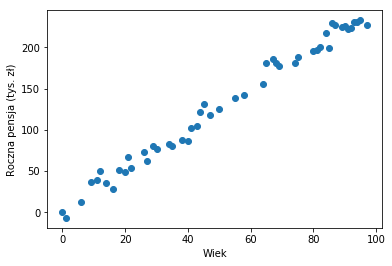

In [0]:
plt.scatter(generated_data.age, generated_data.wage)
plt.xlabel("Wiek")
plt.ylabel("Roczna pensja (tys. zł)")

In [0]:
def calculate_linear_model(data, x_cols, y_cols):
    model = LinearRegression()
    x = data.loc[:, x_cols].values
    y = data[y_cols].values
    model.fit(x, y)
    y_hat = (np.dot(model.coef_, x.T) + model.intercept_)
    mse = mean_squared_error(y, y_hat)
    return {
        'weight': model.coef_[0],
        'bias': model.intercept_,
        'mse': mse
    }

## Baseline

In [0]:
calculate_linear_model(generated_data, ['age'], 'wage')

{'bias': 3.9320232835498388,
 'mse': 73.74287665166943,
 'weight': 2.448497144093145}

##Jak korzystać z unit testów?

In [0]:
assert 1 == 1 # Test przechodzi!

### Zadanie 1a

In [0]:
INIT_WEIGHT = 0.5
INIT_BIAS = 0

In [0]:
######## Miejsce na rozwiązanie zadania 1a ########
def get_linear_forward(x, weight, bias):
  return weight * x + bias

In [0]:
### Unit test 
x = np.array([1, 2, 3])
y = np.array([ 3.9,  1.6,  6.9])

y_hat = get_linear_forward(x=x, weight=3, bias=2)
assert np.mean(y_hat) == 8
assert y_hat.shape == (3,)

### Zadanie 1b

In [0]:
######## Miejsce na rozwiązanie zadania 1b ########
def compute_mse_loss(y_hat, y):
  return np.mean(np.power(y_hat - y, 2))

In [0]:
### Unit test 
x = np.array([1, 2, 3])
y = np.array([ 3.9,  1.6,  6.9])

y_hat = get_linear_forward(x=x, weight=3, bias=2)
assert np.mean(y_hat) == 8
assert y_hat.shape == (3,)
assert compute_mse_loss(y_hat, y) == 19.66

### Zadanie 2

In [0]:
######## Miejsce na rozwiązanie zadania 2 ########
def train(x_train, y_train, init_w, init_b):
  output = get_linear_forward(x_train, init_w, init_b)
  return compute_mse_loss(output, y_train)

In [0]:
### Unit test
first_step = train(x_train=generated_data.age, 
                   y_train=generated_data.wage, 
                   init_w=INIT_WEIGHT, 
                   init_b=INIT_BIAS)

assert type(first_step) == float
assert first_step == 14596.130125359838

### Zadanie 3a

In [0]:
######## Miejsce na rozwiązanie zadania 3a ########
def get_backprop(output, x, y):
  grad_w = 2*x*(output - y)
  grad_b = 2*(output - y)

  return grad_w, grad_b

In [0]:
### Unit test
x = np.array([1, 2, 3])
y = np.array([ 3.9,  1.6,  6.9])
output = get_linear_forward(x, weight = 3, bias = 2)

back_step = get_backprop(output, x, y)
assert len(back_step) == 2
assert len(back_step[0]) == 3
assert len(back_step[1]) == 3
assert np.sum(back_step) == 75.60000000000001

### Zadanie 3b

In [0]:
######## Miejsce na rozwiązanie zadania 3b ########
def get_backprop(output, x, y):
  grad_w = np.mean(2*x*(output - y))
  grad_b = np.mean(2*(output - y))

  return grad_w, grad_b

In [0]:
### Unit test
x = np.array([1, 2, 3])
y = np.array([ 3.9,  1.6,  6.9])
output = get_linear_forward(x, weight = 3, bias = 2)

back_step = get_backprop(output, x, y)
assert len(back_step) == 2
assert type(back_step[0]) == np.float64
assert type(back_step[1]) == np.float64
assert np.sum(back_step) == 25.2

### Zadanie 4

In [0]:
######## Miejsce na rozwiązanie zadania 4 ########
def update_parameters(w_current, b_current, alpha, w_gradient, b_gradient):
  
  new_w = w_current - alpha * w_gradient
  new_b = b_current - alpha * b_gradient
  
  return new_w, new_b

In [0]:
### Unit test
w_current = 1
b_current = 0
alpha = 0.1
w_gradient = 0.7
b_gradient = -0.01

new_params = update_parameters(w_current, b_current, alpha, w_gradient, b_gradient)
assert len(new_params) == 2
assert new_params[0] == 0.93
assert new_params[1] == 0.001

### Zadanie 5

In [0]:
######## Miejsce na rozwiązanie zadania 5 ########
def train(x, y, init_weight, init_bias, alpha, epochs):

  new_w = init_weight
  new_b = init_bias
  
  for e in range(epochs):
    output = get_linear_forward(x, new_w, new_b)
    grad_w, grad_b = get_backprop(output, x, y)
    new_w, new_b = update_parameters(new_w, new_b, alpha, grad_w, grad_b)
    
    if e % (epochs / 10) == 0:
      loss = compute_mse_loss(output, y)
      print(f'Cost after {e} epochs is: {loss}')
  return new_w, new_b

In [0]:
### Unit test
x = np.array([1, 2, 3])
y = np.array([ 3.9,  1.6,  6.9])
init_weight = 0.1
init_bias = 0
alpha = 0.1
epochs = 10

train(x, y, init_weight, init_bias, alpha, epochs)

Cost after 0 epochs is: 19.986666666666668


(1.6495331591384892, 0.7934093138414753)

In [0]:
### Unit test
x = np.array([1, 2, 3])
y = np.array([ 3.9,  1.6,  6.9])
init_weight = 0.1
init_bias = 0
alpha = 0.1
epochs = 10

final_params = train(x, y, init_weight, init_bias, alpha, epochs)
rounded_final_params = np.round(final_params, 2)
assert len(final_params) == 2
assert rounded_final_params[0] == 1.65
assert rounded_final_params[1] == 0.79

In [0]:
train(generated_data.age, generated_data.wage, INIT_WEIGHT, INIT_BIAS, 
      alpha=0.0001, epochs=100000)

Cost after 0 epochs is: 14596.130125359838
Cost after 10000 epochs is: 75.1442418478872
Cost after 20000 epochs is: 74.25603163106543
Cost after 30000 epochs is: 73.9307848668796
Cost after 40000 epochs is: 73.81168529381692
Cost after 50000 epochs is: 73.7680731510821
Cost after 60000 epochs is: 73.752103161056
Cost after 70000 epochs is: 73.74625523510146
Cost after 80000 epochs is: 73.74411382875657
Cost after 90000 epochs is: 73.74332968388715


(2.448867222178931, 3.9063251406244275)